<a href="https://colab.research.google.com/github/Andicleomj/Robotika-dan-Sistem-Cerdas/blob/main/Week10/Simulasi%20Python%20dan%20OpenCV/Simulasi%20Image%20Processing%2C%20Feature%20Detection%2C%20and%20Feature%20Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071

Silakan upload file gambar Anda.


Saving bunga.jpg to bunga (1).jpg


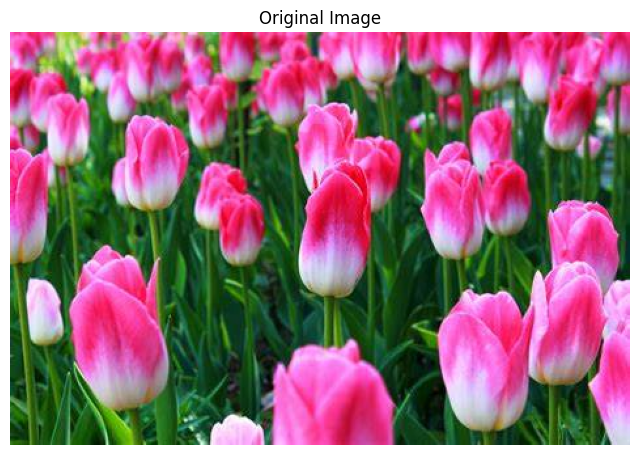

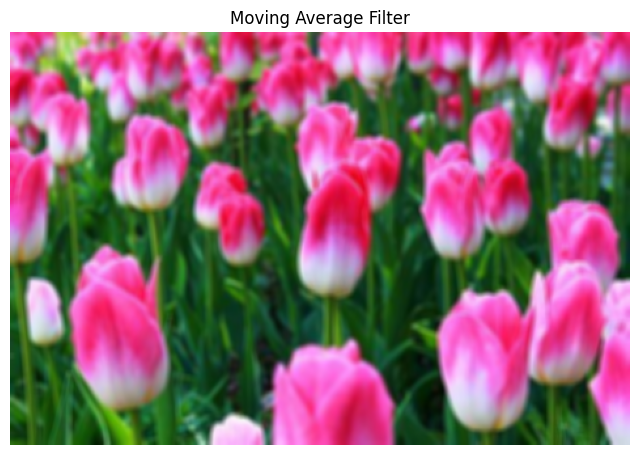

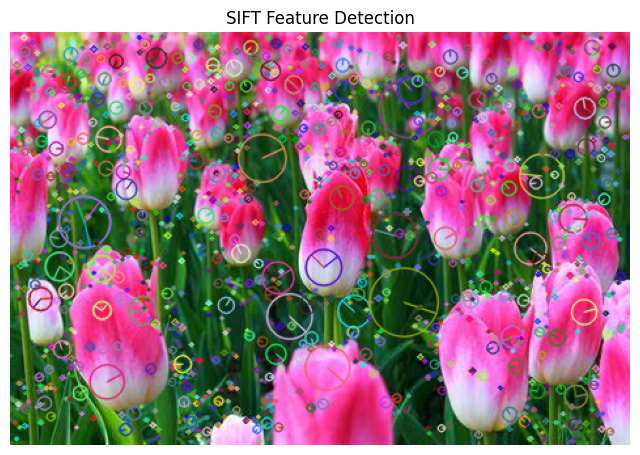

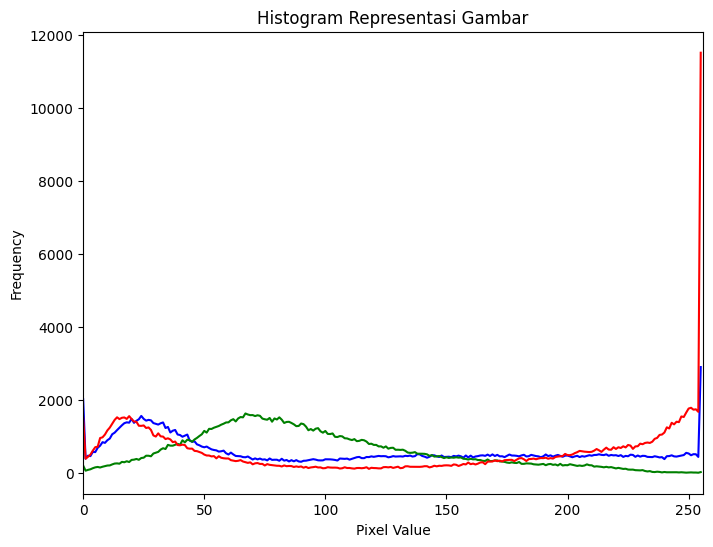

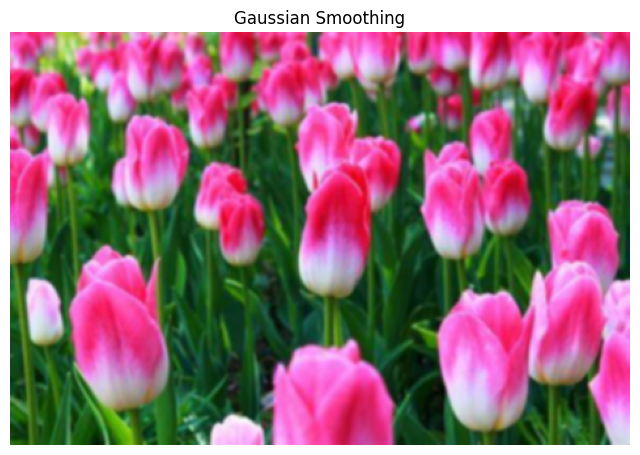

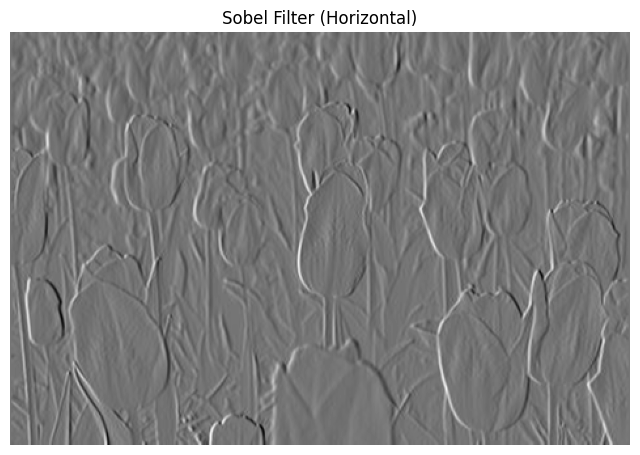

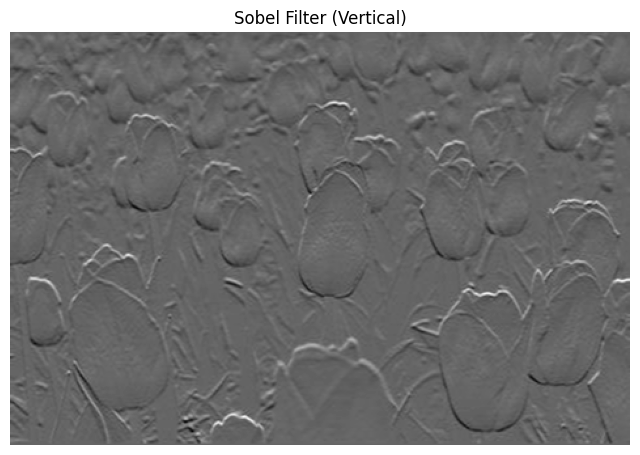

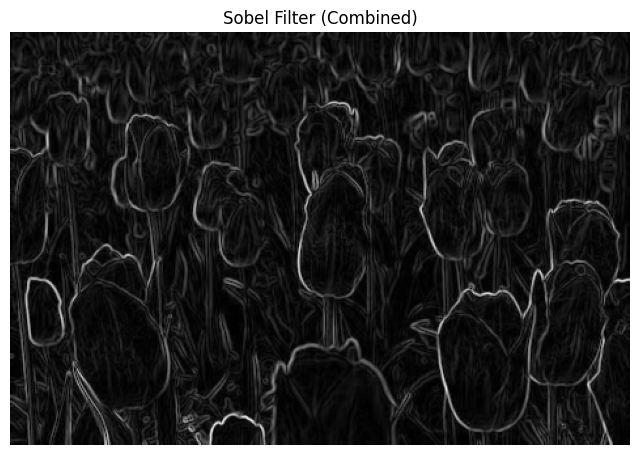

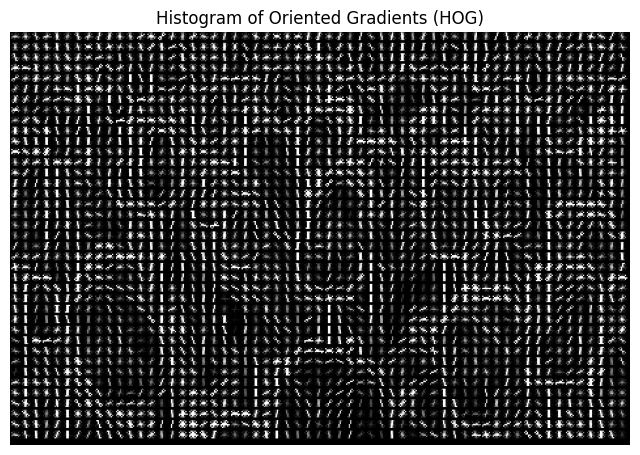

In [4]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.feature import hog
from skimage import exposure

# Fungsi untuk menampilkan gambar
def show_image(title, image):
    plt.figure(figsize=(8, 6))
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:  # Gambar berwarna
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Upload gambar dari komputer
print("Silakan upload file gambar Anda.")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Membaca gambar input
image = cv2.imread(file_name)
show_image('Original Image', image)

# 1. Membuat dan Mengaplikasikan Filter Moving Average
kernel_size = 5  # Ukuran kernel
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
moving_avg = cv2.filter2D(image, -1, kernel)
show_image('Moving Average Filter', moving_avg)

# 2. Deteksi Fitur dengan SIFT
sift = cv2.SIFT_create()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_image('SIFT Feature Detection', sift_image)

# 3. Representasi Histogram Gambar
# Menghitung histogram untuk setiap channel warna
colors = ('b', 'g', 'r')
plt.figure(figsize=(8, 6))
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogram Representasi Gambar')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# 4. Gaussian Smoothing
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
show_image('Gaussian Smoothing', gaussian_blur)

# 5. Deteksi Tepi dengan Sobel Filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Deteksi tepi horizontal
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Deteksi tepi vertikal
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Magnitudo tepi
show_image('Sobel Filter (Horizontal)', sobel_x)
show_image('Sobel Filter (Vertical)', sobel_y)
show_image('Sobel Filter (Combined)', sobel_combined)

# 6. Representasi Fitur dengan Histogram of Oriented Gradients (HOG)
# Menghitung HOG
hog_features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys', feature_vector=False)
# Normalisasi untuk visualisasi
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
show_image('Histogram of Oriented Gradients (HOG)', hog_image_rescaled)

